In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

step 1: load data sets 

In [28]:
intl= pd.read_csv('soccer-spi/spi_global_rankings_intl.csv')
intl['type'] = 0
intl.head(5)

,rank,name,confed,off,def,spi,type
0,1,Brazil,CONMEBOL,3.12,0.28,93.19,0
1,2,Germany,UEFA,3.43,0.67,89.95,0
2,3,Spain,UEFA,2.60,0.34,88.51,0
3,4,Portugal,UEFA,2.89,0.53,87.92,0
4,5,England,UEFA,2.66,0.43,87.59,0


In [29]:
club= pd.read_csv('soccer-spi/spi_global_rankings.csv')
club['type'] = 1
club.head(5)

,rank,prev_rank,name,league,off,def,spi,type
0,1,1,Bayern Munich,German Bundesliga,3.41,0.51,92.58,1
1,2,2,Manchester City,Barclays Premier League,2.85,0.36,91.17,1
2,3,3,Barcelona,Spanish Primera Division,2.67,0.43,88.48,1
3,4,4,Paris Saint-Germain,French Ligue 1,2.89,0.62,87.29,1
4,5,5,Liverpool,Barclays Premier League,2.75,0.60,86.36,1


check the data for any na cells and do clean up if necessary

In [30]:
intl.isna().sum()

rank      0
name      0
confed    0
off       0
def       0
spi       0
type      0
dtype: int64

In [31]:
club.isna().sum()

rank         0
prev_rank    0
name         0
league       0
off          0
def          0
spi          0
type         0
dtype: int64

the data is actually very clean (as expected since i got it from 538 rather than from kaggle)
so lets move onto some initial general analysis

In [32]:
intl.describe()

,rank,off,def,spi,type
count,220.000000,220.000000,220.000000,220.000000,220.0
mean,110.500000,1.149818,1.713227,39.068227,0.0
std,63.652704,0.641840,1.164495,25.166483,0.0
min,1.000000,0.200000,0.280000,0.260000,0.0
25%,55.750000,0.687500,0.930000,17.737500,0.0
50%,110.500000,1.050000,1.345000,37.920000,0.0
75%,165.250000,1.582500,2.170000,59.230000,0.0
max,220.000000,3.430000,6.270000,93.190000,0.0


In [33]:
club.describe()

,rank,prev_rank,off,def,spi,type
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.0
mean,322.000000,322.000000,1.205630,1.481011,40.078180,1.0
std,185.762393,185.762393,0.498498,0.438307,18.198985,0.0
min,1.000000,1.000000,0.200000,0.360000,4.030000,1.0
25%,161.500000,161.500000,0.870000,1.195000,27.370000,1.0
50%,322.000000,322.000000,1.170000,1.460000,38.940000,1.0
75%,482.500000,482.500000,1.490000,1.760000,51.455000,1.0
max,643.000000,643.000000,3.410000,3.010000,92.580000,1.0


step 3: analyze data to answer questions

question 1: Is the average SPI higher on average for national teams or club teams? 
    this can be answered just by looking at the general stats above: 
    club mean is very slightly above intl mean 40.078 to 39.068 but the international teams have both a higher max and a lower min

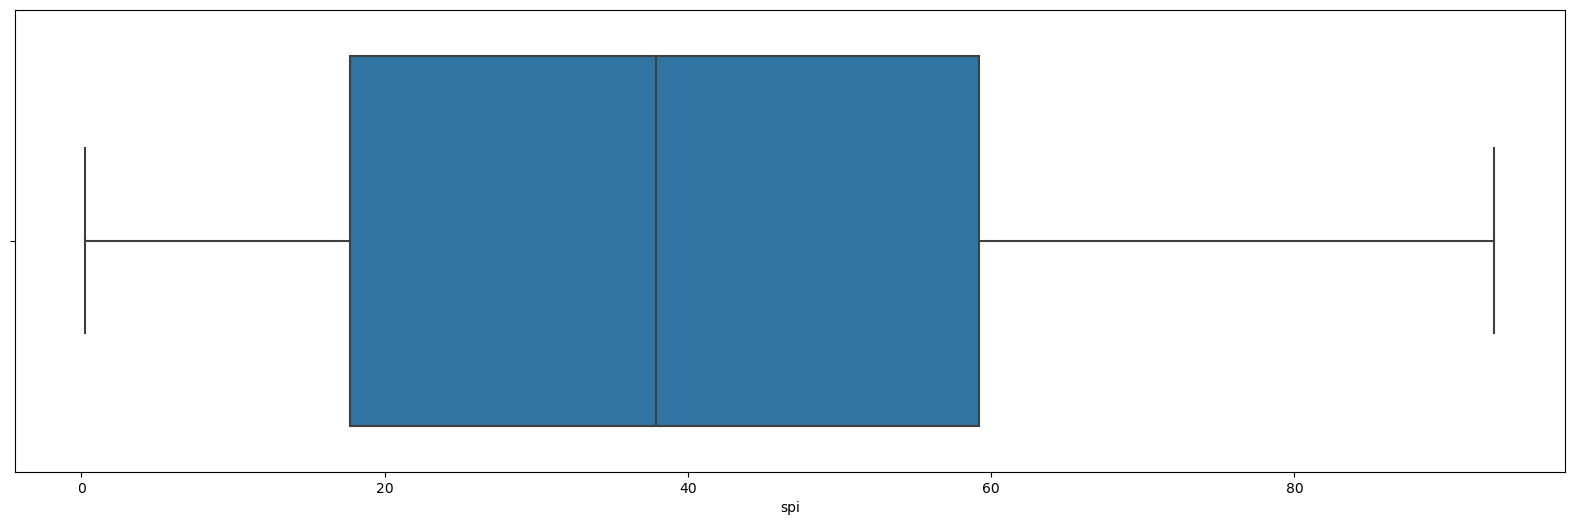

In [34]:
# Box Plot of intl  team spi
fig, ax = plt.subplots(figsize=(20,6))

sns.boxplot(data=intl, x=intl["spi"], sym="red")
plt.show()

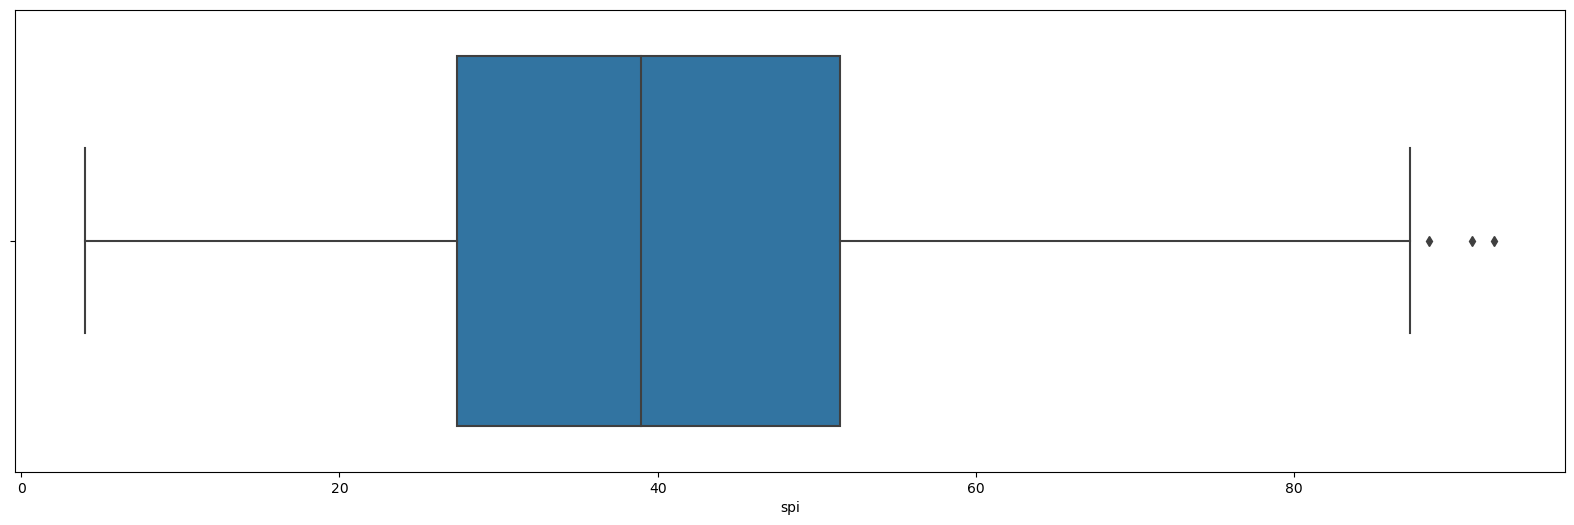

In [35]:
# Box Plot of club team spi
fig, ax = plt.subplots(figsize=(20,6))

sns.boxplot(data=club, x=club["spi"], sym="red")
plt.show()

In [38]:
allSPI = pd.concat([intl[["spi", "type"]], club[["spi","type"]]])
allSPI.head(2)

,spi,type
0,93.19,0
1,89.95,0


Text(0.5, 0, 'spi')

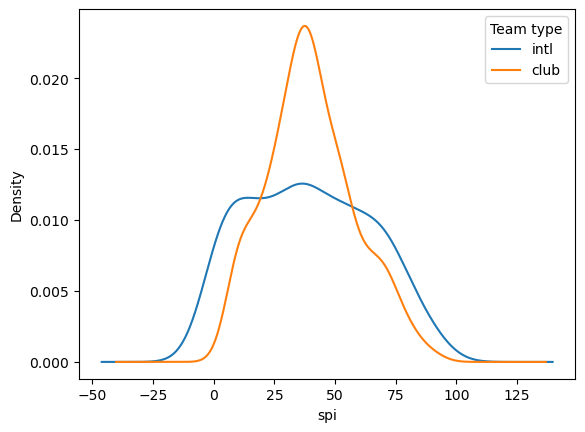

In [40]:
allSPI.groupby('type')['spi'].plot(kind='kde')
plt.legend(['intl', 'club'], title='Team type')
plt.xlabel('spi')

question 2: Which intl conference has the highest average SPI and Ranking?

<AxesSubplot:xlabel='confed', ylabel='spi'>

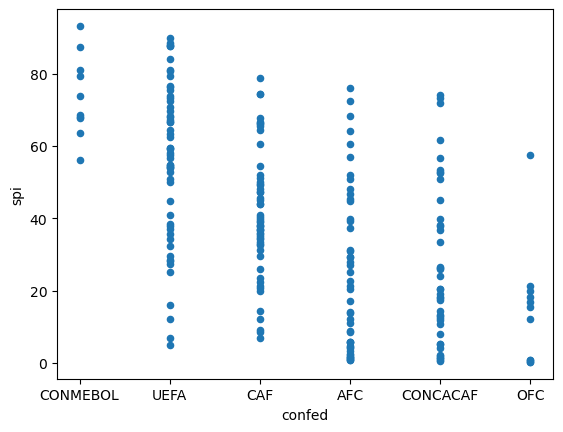

In [41]:
intl.plot(x='confed', y='spi', kind = 'scatter')

<AxesSubplot:ylabel='confed'>

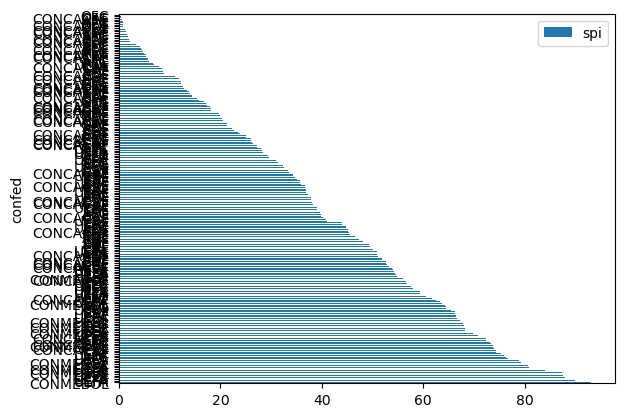

In [44]:
intl.plot(x='confed', y='spi', kind = 'barh')

question 3: how correlated is SPI with ranking?

<AxesSubplot:xlabel='rank', ylabel='spi'>

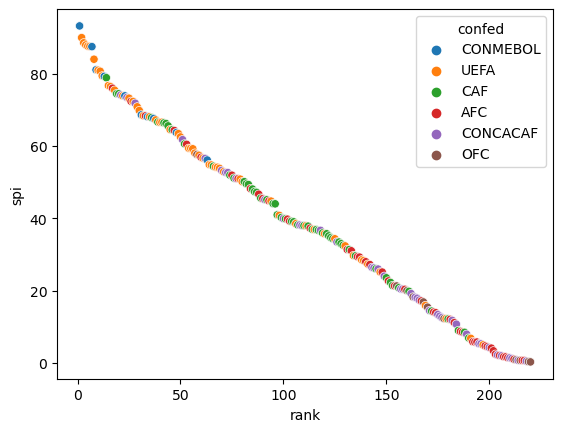

In [52]:
sns.scatterplot(x='rank', y='spi', hue='confed', data=intl)